<a href="https://colab.research.google.com/github/mmobik/Practices/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_0_7_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
print("Ощепков Сергей Алексеевич")

Ощепков Сергей Алексеевич


## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


# функция отправки запроса
def send_request(url):
    response = requests.get(url)

    status_code = response.status_code
    if status_code == 200:
        return response.json()
    return None

# функция очистки данных
def clear_data(data):
    # получение текущей даты
    current_date = datetime.today().date()
    current_date = f'{current_date.day}.{current_date.month}'

    # получение температуры
    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    # получение кода температуры
    weather_code = data['current']['weather_code']

    # определение погоды по коду
    if weather_code in [0, 1]:
        weather = 'нет осадков, ясно'
    elif weather_code == 45:
        weather = 'нет осадков, туман'
    elif weather_code in [61, 63, 65 ,71 ,73, 75]:
        weather = 'осадки, нет тумана'
    else:
        weather = 'выгляни в окно и посмотри сам'

    # формирование сообщения
    message = f'Сегодня ({current_date}) погода {temperature} {temperature_format}, {weather}'

    return message


# основная функция
def main():
    coordinates = input('Введите ваши координаты').split(', ')
    url = f'https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}&longitude={coordinates[1]}&current=temperature_2m,weather_code&forecast_days=1'
    data = send_request(url)
    message = clear_data(data)
    print(message)


main()

## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests

pokemon_info_url = ""  # Глобальная переменная для хранения URL информации о покемоне


def send_request(url):
    # Отправляет get запрос к указанному URL и возвращает данные ответа
    response = requests.get(url)
    if response.status_code == 200:  # Проверка запроса
        return response.json()
    else:
        print(f"Ошибка запроса: {response.status_code}")
        return None


def list_pokemons():
    # Выводит имена покемонов
    # Просит пользователя ввести имя покемона и если  имя покемона найдено, сохраняет URL информацию о покемоне
    url = "https://pokeapi.co/api/v2/pokemon"
    data = send_request(url)

    pokemons = [pokemon["name"] for pokemon in data['results']]  # Добавляем имена покемонов в pokemons
    print(f"Список покемонов: {pokemons}\n")
    pokemon_name = input("Введите имя покемона: ")
    if pokemon_name in pokemons:
        for pokemon in data['results']:
            if pokemon["name"] == pokemon_name:
                global pokemon_info_url  # Используем глобальную переменную, чтобы хрнаить URL
                pokemon_info_url = pokemon['url']
                print(f"Имя: {pokemon_name}")
                break
    else:
        print("Такого покемона нет в списке")


def pokemon_data():
    # Получает информацию о покемоне по URL и выводит характеристики
    abilities = []
    url = pokemon_info_url
    data = send_request(url)

    if data['types']:
        print(f"Тип: {data['types'][0]['type']['name']}")  # Находим тип покемона из URL
    else:
        print(f"Тип: Неизвестно")

    print(f"Вес: {data['weight']}")
    print(f"Рост: {data['height']}")
    for ability in data["abilities"]:
        abilities.append(ability["ability"]["name"])
        # Добавляем абилки покемона
    print(f"Способности: {abilities}")
    # Выводим все характеристики


list_pokemons()
pokemon_data()



## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests  # Используем библиотеку requests


def get_request(url):  # Функция выполняет GET-запрос и возвращает список постов
    response = requests.get(url)  # Получаем инфу в переменную через get запрос
    if response.status_code == 200:  # Проверка получили ли мы информацию
        return response.json()
    else:
        print(f"Ошибка: {response.status_code}")


def post_id():  # Функция получает вводимое ID поста и возвращает данные поста
    url = "https://jsonplaceholder.typicode.com/posts"
    posts = get_request(url)  # Используем функцию и передаем ее значение в posts
    id = int(input("Введите id поста: "))
    if id > 100 or id < 1:  # Проверка на введеный айди
        print("Айди не найден")
    else:
        for post in posts:  # Перебор всех эелементов из списка posts
            if post["id"] == id:  # Ищем пост в словаре по ключу "id" и введеному айди
                return post


def info():  # Функция выводит всю важную информацию в посте
    important_info = post_id()  # Используем функцию и передаем ее значение в important_info
    print(f"\nid: {important_info['id']}")
    print(f"Загаловок: {important_info['title']}")
    print(f"Коментарий: {important_info['body']}")
    # Выводим главную инфу


info()


Введите id поста: 5

id: 5
Загаловок: nesciunt quas odio
Коментарий: repudiandae veniam quaerat sunt sed
alias aut fugiat sit autem sed est
voluptatem omnis possimus esse voluptatibus quis
est aut tenetur dolor neque


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests  # Используем библиотеку requests


def get_request(url):
    response = requests.get(url)  # Запрашиваем данные с сервера
    if response.status_code == 200:
        return response.json()  # Возращаем данные
    else:
        print(f"Ошибка: {response.status_code}")


def accept_data():  # Функция создает новый пост
    url = "https://jsonplaceholder.typicode.com/posts"
    title = input("Введите заголовок: ")
    body = input("Введите содержимое поста: ")
    user_id = int(input("Введите ID пользователя: "))

    data = {
        "userId": user_id,
        "title": title,
        "body": body
    }

    response = requests.post(url, json=data)  # Создаем новый пост
    if response.status_code == 200 or response.status_code == 201:  # Проверка на ошибки
        print('Данные успешно отправлены!')
        print('Ответ сервера:', response.json())
    else:
        print('Ошибка:', response.status_code, response.text)


def update_post(post_id, new_title, new_body):  # Функция обновления поста
    url = f"https://jsonplaceholder.typicode.com/posts/{post_id}"
    data = {
        "title": new_title,
        "body": new_body
    }
    response = requests.put(url, json=data)  # Заменяем пост на новый
    if response.status_code == 200:
        return response.json()  # Возращаем новый пост
    else:
        print('Ошибка:', response.status_code)
        return None


def delete_post(post_id):  # Функция удаления отзыва
    url = f"https://jsonplaceholder.typicode.com/posts/{post_id}"
    response = requests.delete(url)  # Удаляем пост
    if response.status_code == 200:
        print('Пост успешно удалён!')
    else:
        print('Ошибка:', response.status_code)


def start():  # Основная функция
    accept_data()  # Вызываем функцию создания отзыва
    post_update = int(input("Введите ID поста для обновления: "))
    new_title = input("Введите новый заголовок: ")
    new_body = input("Введите новое содержимое: ")

    updated_post = update_post(post_update, new_title, new_body)  # Вызываем функцию замены поста
    if updated_post:
        print('Обновленный пост:', updated_post)

    post_delete = int(input("Введите ID поста для удаления: "))
    delete_post(post_delete)  # Вызываем функцию удаления поста


start()  # Вызов главной функции


Введите заголовок: Новый пост
Введите содержимое поста: Тут должно находиться содержимое нового поста...
Введите ID пользователя: 10
Данные успешно отправлены!
Ответ сервера: {'userId': 10, 'title': 'Новый пост', 'body': 'Тут должно находиться содержимое нового поста...', 'id': 101}
Введите ID поста для обновления: 5
Введите новый заголовок: ен
Введите новое содержимое: рж
Обновленный пост: {'title': 'ен', 'body': 'рж', 'id': 5}
Введите ID поста для удаления: 5
Пост успешно удалён!


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. australian
7. bakharwal
8. basenji
9. beagle
10. bluetick
11. borzoi
12. bouvier
13. boxer
14. brabancon
15. briard
16. buhund
17. bulldog
18. bullterrier
19. cattledog
20. cavapoo
21. chihuahua
22. chippiparai
23. chow
24. clumber
25. cockapoo
26. collie
27. coonhound
28. corgi
29. cotondetulear
30. dachshund
31. dalmatian
32. dane
33. danish
34. deerhound
35. dhole
36. dingo
37. doberman
38. elkhound
39. entlebucher
40. eskimo
41. finnish
42. frise
43. gaddi
44. germanshepherd
45. greyhound
46. groenendael
47. havanese
48. hound
49. husky
50. keeshond
51. kelpie
52. kombai
53. komondor
54. kuvasz
55. labradoodle
56. labrador
57. leonberg
58. lhasa
59. malamute
60. malinois
61. maltese
62. mastiff
63. mexicanhairless
64. mix
65. mountain
66. mudhol
67. newfoundland
68. otterhound
69. ovcharka
70. papillon
71. pariah
72. pekinese
73. pembroke
74. pinscher
75. pitbull
76. pointer
77. pomeranian
78. poodle
79. pug
80. pug

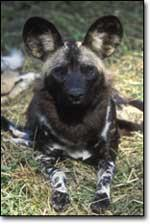

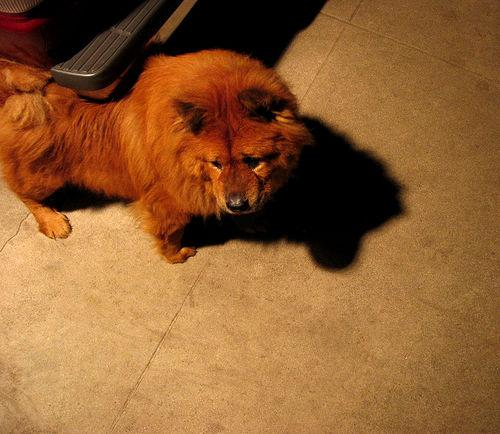

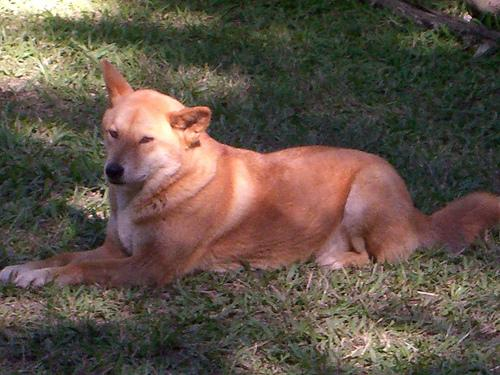

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


def list_breeds():  # Функция выводит нумерованный список пород собак
    url = "https://dog.ceo/api/breeds/list/all"
    response = requests.get(url)  # Запрашиваем данные с сервера
    response = response.json()  # Получаем данные

    dog_count = 0
    for dog in response['message']:  # Выполняем перебор всех пород
        dog_count += 1
        print(f"{dog_count}. {dog}")


def display_images():  # Функция возращает изображения по заданным породам
    dog_breeds = input("Введите несколько пород собак через запятую: ").lower()
    dog_breeds = dog_breeds.replace(",", "")  # Убираем запятые с помощью метода replace
    dog_breeds = dog_breeds.split()  # создаем новый список

    for dog in dog_breeds:  # Перебираем список
        url = f"https://dog.ceo/api/breed/{dog}/images/random"
        response = requests.get(url)  # Запрашиваем данные с сервера
        if response.status_code == 200:  # Проверка данных на правильность
            image_url = response.json()['message']  # Получаем данные - ссылку
            res = requests.get(image_url)  # Запрашиваем изображение с сервера
            img = Image.open(io.BytesIO(res.content))
            display(img)  # Выводим изображение
        else:
            print(f"Ошикба: {response.status_code}")


list_breeds()
display_images()
